In [1]:
from operator import attrgetter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
from notify_run import Notify
import igraph

In [2]:
sns.set_theme(style="whitegrid")
sns.set_palette(sns.color_palette('colorblind'))
notify = Notify()

In [3]:
os.chdir(r"C:/Users/nieli/Documents/uva/thesis/code/")
print(os.getcwd())


C:\Users\nieli\Documents\uva\thesis\code


In [4]:
try:
    test = pickle.load(open(r"PPA/results/results-2021-05-18_12-45-12/mulambda-Ackley2Drun-0.p", "rb"))
except Exception as e:
    print(e) # you will find what is going on here

### Load files

In [7]:
df = pd.DataFrame(columns=['run_n', 'benchmark','selection_method','best_final_objval','best_objval','theoretical_optimum','dimensions'])

directory = 'PPA/results/results-2021-05-19_13-52-40/'
i = 0
for filename in os.listdir(directory):
    i+=1
    if i%1000 == 0:
        print(f'total of {i/1000*1000} files read')
    file = pickle.load(open(directory+filename,"rb"))


    df = df.append({
        'run_n':file.run_n,
        'benchmark':file.benchmark_name,
        'selection_method':file.survivor_selection_name,
        'best_final_objval': min(individual.objective_value for individual in file.parent_population), #this is the best object value at the end of the run
        'best_objval': file.best_objval_during_run.objective_value,   #this is the best obj value recorded during the run
        'theoretical_optimum': file.benchmark_optimum,
        'dimensions': file.benchmark_dimensions,
        'diplay_name': f"{file.benchmark_name}-{file.benchmark_dimensions:03d}D"
    }, ignore_index=True)
df.loc[df['selection_method'] == 'single_elitist_tournament','selection_method'] = 'tour_elite'
df.loc[df['selection_method'] == 'no_replacement_tournament','selection_method'] = 'tour_no_replace'
df.loc[df['selection_method'] == 'mupluslambda','selection_method'] = 'original'
df['error'] = abs(df['best_objval'] - df['theoretical_optimum'])

df = df.sort_values(by="benchmark")
df = df.astype({'theoretical_optimum':float,'error':float})
notify.send('Done reading all files')

df_2d = df[~df['benchmark'].isin(['Ackley', 'Rosenbrock', 'Griewank', 'Rastrigrin', 'Schwefel', 'Ellipse', 'Cigar', 'Tablet',
                    'Sphere'])]
df_nd = df[df['benchmark'].isin(['Ackley', 'Rosenbrock', 'Griewank', 'Rastrigrin', 'Schwefel', 'Ellipse', 'Cigar', 'Tablet',
                    'Sphere'])]
df_2d = df_2d.sort_values(by=['benchmark','dimensions']).reset_index()
df_nd = df_nd.sort_values(by=['benchmark','dimensions']).reset_index()


total of 1000.0 files read
total of 2000.0 files read
total of 3000.0 files read
total of 4000.0 files read


### Make nd plots

In [14]:
benchmarks = df_nd.benchmark.unique()
i = 0
sns.set_theme(style="whitegrid")
sns.set_palette("colorblind")
for benchmark in benchmarks:
    data = df_nd[df_nd['benchmark'] == benchmark]
    dimensions = data.dimensions.unique()
    fig, axes =plt.subplots(1,len(dimensions), figsize=(40,4))
    plot_data = data.groupby(['selection_method', 'dimensions']).median().reset_index()[['selection_method','error','dimensions']]
    i = 0
    for dim in dimensions:

        ax = sns.barplot(x="selection_method", y="error", data=plot_data[plot_data.dimensions == dim], ax=axes[i])
        ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
        ax.set_title(f'{benchmark} - {dim}D; median best objective value during run')

        ax.set_yscale("log")
        ax.grid()
        ax.yaxis.grid(True)
        plt.savefig(f'PPA/notebooks/images/{benchmark}.png',bbox_inches='tight')
        i+=1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Make 2d plots

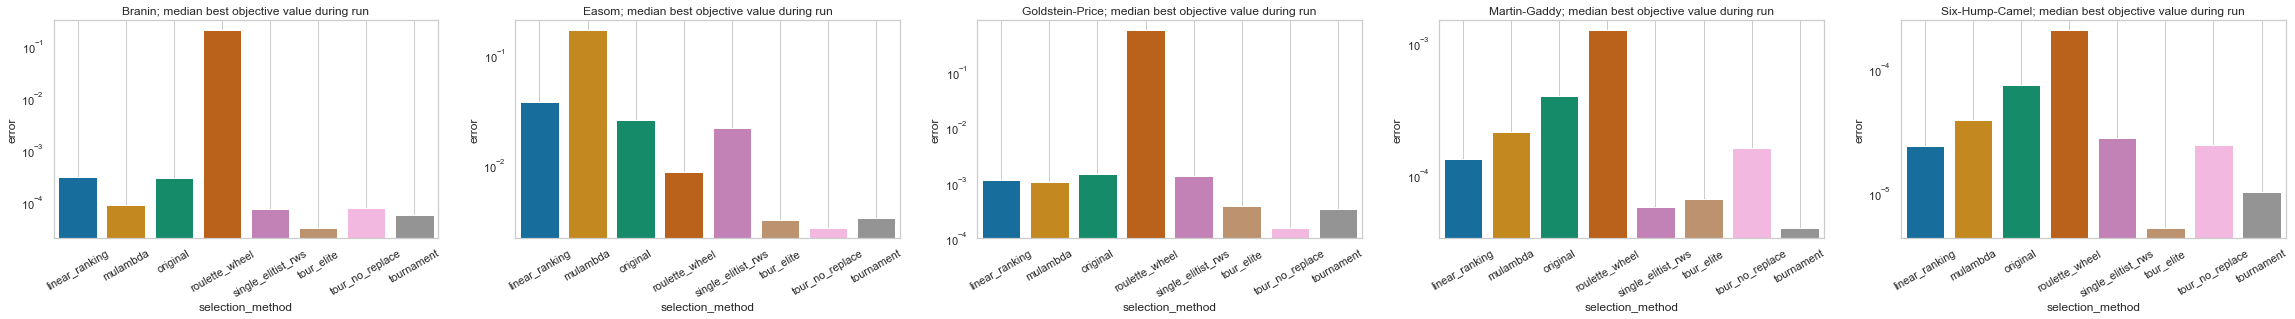

In [17]:
%matplotlib inline

fig, axes =plt.subplots(1,5, figsize=(40,4))
# fig.subplots_adjust(hspace=0.6)

benchmarks = df_2d.benchmark.unique()
i = 0
sns.set_palette("colorblind")
for benchmark in benchmarks:

    plot_data = df_2d[df_2d['benchmark'] == benchmark]
    optimum = plot_data['theoretical_optimum'][:1].item()
    plot_data = plot_data.groupby('selection_method').std().reset_index()[['selection_method','error']]

    ax = sns.barplot(x="selection_method", y="error", data=plot_data, ax = axes[i])
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
    ax.set_title(f'{benchmark}; median best objective value during run')
    ax.grid()
    ax.set_yscale("log")

    plt.savefig(f'PPA/notebooks/images/{benchmark}.png',bbox_inches='tight')


    i+=1